In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import BayesianGaussianMixture

In [61]:
from get_data import gmm_playlists_to_csv
gmm_playlists_to_csv('kronovi')

### edit above lines if moodify is running and you wish to
### use someone else's data

'data.csv updated for the user kronovi'

In [62]:
df = pd.read_csv('data.csv')
df.head()

,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
0,5GFDrUTLGJix84sNhjCG0g,Caroline,0,0.945,0.394,0.3030,0.718,120.058
1,1jrARDhheF2nrDEevG9rmo,Warlocks,0,0.671,0.984,0.0561,0.880,97.743
2,5rAZJ4K9K0U4BVE6mJBZbW,To the Stars,0,0.479,0.911,0.0122,0.133,175.058
3,3NVbVYXTpyIRA6Uv4mD8Tk,Wave Goodbye (feat. Shwayze),0,0.659,0.824,0.1210,0.629,106.836
4,7gKIt3rDGIMJDFVSPBnGmj,Super Bass,0,0.721,0.867,0.2900,0.659,127.033


In [63]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 8 columns):
track_id        247 non-null object
track_name      247 non-null object
playlist_id     247 non-null int64
danceability    247 non-null float64
energy          247 non-null float64
acousticness    247 non-null float64
valence         247 non-null float64
tempo           247 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 15.5+ KB


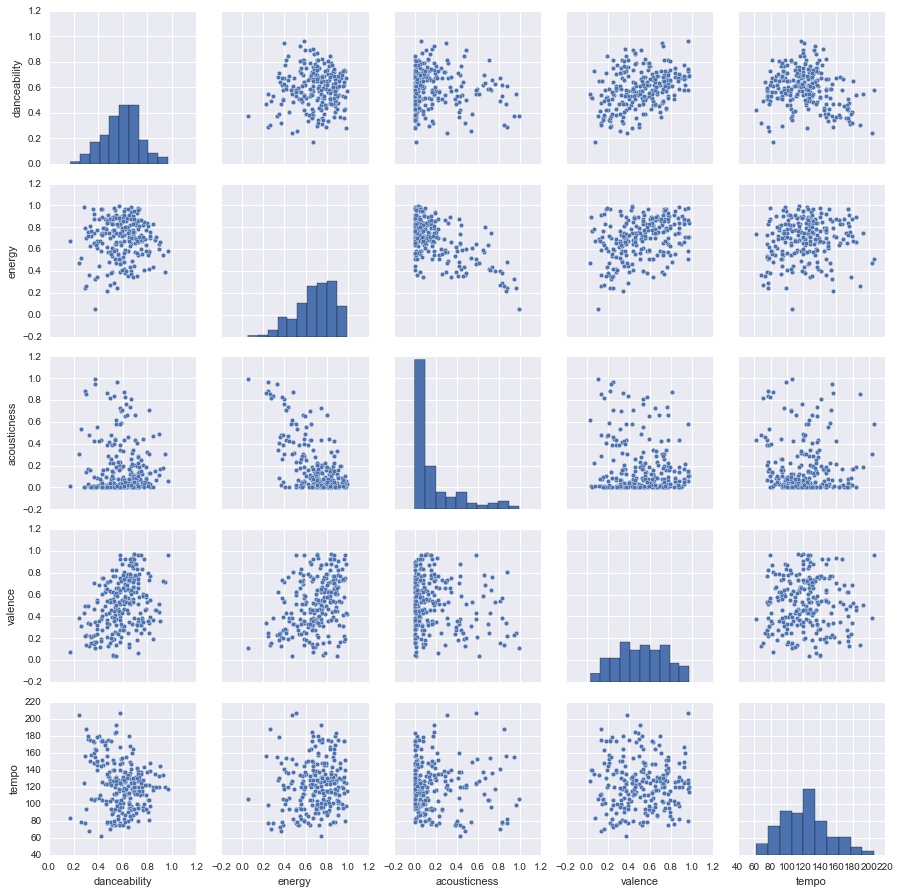

In [64]:
sns.pairplot(df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])

,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
0,5GFDrUTLGJix84sNhjCG0g,Caroline,0,0.945,0.394,0.30300,0.718,120.058
1,1jrARDhheF2nrDEevG9rmo,Warlocks,0,0.671,0.984,0.05610,0.880,97.743
2,5rAZJ4K9K0U4BVE6mJBZbW,To the Stars,0,0.479,0.911,0.01220,0.133,175.058
3,3NVbVYXTpyIRA6Uv4mD8Tk,Wave Goodbye (feat. Shwayze),0,0.659,0.824,0.12100,0.629,106.836
4,7gKIt3rDGIMJDFVSPBnGmj,Super Bass,0,0.721,0.867,0.29000,0.659,127.033
5,6elNeXUhiuHPD9hH5rocQi,Trap Niggas,0,0.813,0.583,0.13100,0.337,81.018
6,4i13Vno2UPtn6kp2Ge9N2J,New Theory,0,0.574,0.865,0.03700,0.395,100.527
7,0d28khcov6AiegSCpG5TuT,Feel Good Inc,0,0.818,0.705,0.00836,0.772,138.559
8,6ZWn1MVUaBH2HNQobhMYeE,Little Black Submarines - radio edit,0,0.299,0.706,0.14100,0.232,94.263
9,1yzbqrSF0vuaO7nuKYSd6f,Coming of Age,0,0.534,0.955,0.02190,0.416,130.090


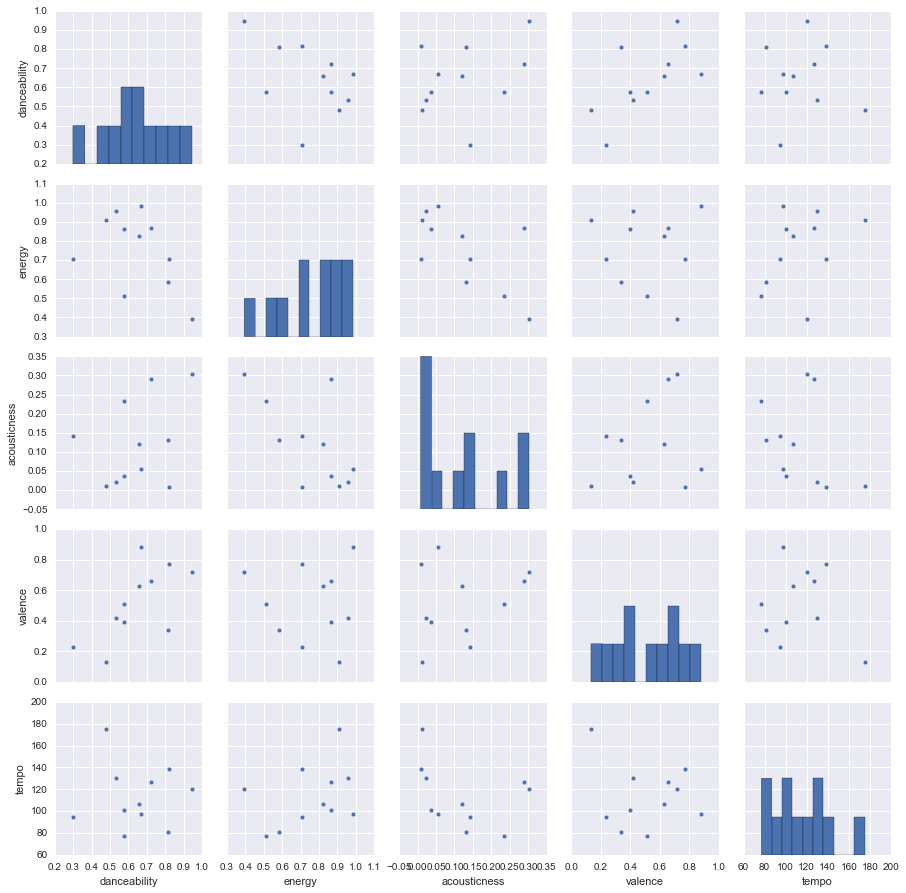

In [65]:
temp_df = df[df['playlist_id'] == 0]
sns.pairplot(temp_df[['danceability', 'energy', 'acousticness', 'valence', 'tempo']])
temp_df

In [66]:
data = df['tempo'].values
mean= data.mean()
result = df[(data > mean - 1) & (data < mean + 1)]
print(result.shape)
result

(7, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
79,0xAjq4KAQdJvUyCM7fFZ9K,Hey,4,0.815,0.577,0.30900,0.737,122.610
81,2hdNya0b6Cc2YJ8IyaQIWp,Livin' Thing,4,0.549,0.651,0.58300,0.377,122.818
101,3wf3jWAQHsnPNfUtNSQvkz,Gotta Get Away,6,0.475,0.836,0.01750,0.716,123.144
109,6n0KwBRfQX2O5CPAfdcD6a,Yay Yay,7,0.788,0.642,0.08600,0.464,122.006
124,5ZbIqhvb7HZ8nzoTXcBj5G,Add It Up,7,0.783,0.692,0.05350,0.456,122.093
174,3NnfJ0a4bGjmEGuOrX2ujS,It's My Life,10,0.584,0.658,0.00285,0.725,122.825
234,3zIIjuvnDALIs9WNl3w3uT,New York State of Mind,13,0.504,0.384,0.48400,0.204,122.306


In [67]:
data = df['energy'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .1
result = df[(data > max_energy - range_) & (data <= max_energy)]
print(result.shape)
result

(28, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
1,1jrARDhheF2nrDEevG9rmo,Warlocks,0,0.671,0.984,0.056100,0.880,97.743
2,5rAZJ4K9K0U4BVE6mJBZbW,To the Stars,0,0.479,0.911,0.012200,0.133,175.058
9,1yzbqrSF0vuaO7nuKYSd6f,Coming of Age,0,0.534,0.955,0.021900,0.416,130.090
19,0kubWs4WUDYh1nBI4PJrBK,Nighttiming,1,0.684,0.904,0.013300,0.909,119.993
25,0GcWf1Cc4ixN35D3O9VdcP,Get On Top,1,0.573,0.994,0.028100,0.425,114.563
26,3QJnjJH53Ocg22MaLutrgJ,Easily,1,0.283,0.982,0.000204,0.433,124.149
49,76GlO5H5RT6g7y0gev86Nk,Just Like Heaven,3,0.430,0.971,0.027100,0.751,151.219
64,4QNpBfC0zvjKqPJcyqBy9W,Give Me Everything,3,0.671,0.939,0.192000,0.533,129.023
77,6tC2iHfUlzB2W4ntXXL2BH,Propane Nightmares,4,0.356,0.966,0.000262,0.225,173.992
92,5jJ69cMDMC0aeWPjZo6VP2,Lampshades on Fire,5,0.659,0.906,0.156000,0.778,94.997


In [68]:
data = df['danceability'].values
max_dance = data.max()
min_dance = data.min()
range_ = (max_dance - min_dance) * .1
result = df[(data > max_dance - range_) & (data <= max_dance)]
print(result.shape)
result

(6, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
0,5GFDrUTLGJix84sNhjCG0g,Caroline,0,0.945,0.394,0.3030,0.718,120.058
60,0O45fw2L5vsWpdsOdXwNAR,SexyBack,3,0.967,0.583,0.0584,0.965,117.000
107,7s49Um7G06hq2rulrHPsIy,Jimmy Choo,7,0.893,0.646,0.1120,0.440,132.970
110,6ZA3Q8Dj5BrnmOsT300DCh,Ice Cream Man,7,0.902,0.670,0.1670,0.362,144.070
125,6br4Pc0BzU6dTD5fEmks2i,Electric Body,7,0.897,0.598,0.4920,0.515,119.966
200,6NMNgWgEAzde5M8U3lc6FN,Fake Love,12,0.924,0.543,0.1820,0.726,133.907


In [69]:
data = df['valence'].values
max_energy = data.max()
min_energy = data.min()
range_ = (max_energy - min_energy) * .9
result = df[(data > 0) & (data <= max_energy - range_)]
print(result.shape)
result

(8, 8)


,track_id,track_name,playlist_id,danceability,energy,acousticness,valence,tempo
38,7osOBKEOPL7mSrg6P0Ohb7,Lilith,2,0.521,0.8950,0.01750,0.0379,139.958
120,2PzYyPp3gJmxC2LXQhWb3a,The Other Side - Original Mix,7,0.519,0.7670,0.00155,0.0497,140.005
134,712uvW1Vezq8WpQi38v2L9,"Bitch, Don’t Kill My Vibe",8,0.648,0.6890,0.01460,0.1180,134.082
141,3CPaiWrgFvDOWFFmrZer63,Waltz No. 1 (Nunley's Carousel),8,0.374,0.0518,0.99400,0.1090,105.401
179,0rILITmuwhudnFKDqdp4CS,No Fuckin With,10,0.727,0.7840,0.22600,0.0654,134.961
195,66KfKphXzxwxlKb3DjLHC0,My Friend,11,0.174,0.6720,0.00974,0.0788,83.039
212,6LrNqp69g8ngQ0Oem7DGWK,Cola,13,0.412,0.6750,0.07940,0.1230,109.914
219,4GKk1uNzpxIptBuaY97Dkj,Midnight,13,0.548,0.4750,0.61500,0.0350,126.976
